In [51]:
from glob import glob
from glob import iglob
import os
import time
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
from torch import nn
from torch import optim
from torchvision import transforms
from torchvision import models
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [4]:
path = 'D:\\PyTorch\\dogs_vs_cats\\data\\'
files = glob(os.path.join(path, '*\\*.jpg'))

In [5]:
print("总图片数: %s" % len(files))

总图片数: 25000


In [6]:
no_of_images = len(files)
np.random.seed(0)
shuffle = np.random.permutation(no_of_images)

In [7]:
shuffle

array([14149,  8946, 22378, ...,  9845, 10799,  2732])

In [32]:
for t in ['train', 'valid']:
    for folder in ['dog\\', 'cat\\']:
        os.mkdir(os.path.join(path, t, folder))

In [8]:
for i in shuffle[:2000]:
    folder = files[i].split('\\')[-1].split('.')[0]
    image = files[i].split('\\')[-1]
    os.rename(files[i], os.path.join(path, 'valid', folder, image))

In [9]:
for i in shuffle[2000:]:
    folder = files[i].split('\\')[-1].split('.')[0]
    image = files[i].split('\\')[-1]
    os.rename(files[i], os.path.join(path, 'train', folder, image))

In [10]:
simple_transform = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
train = ImageFolder('D:\\PyTorch\\dogs_vs_cats\\data\\train', simple_transform)
valid = ImageFolder('D:\\PyTorch\\dogs_vs_cats\\data\\valid', simple_transform)

In [11]:
train.class_to_idx

{'cat': 0, 'dog': 1}

In [12]:
train.classes

['cat', 'dog']

In [18]:
print(train.imgs[:10])
print(train.imgs[-10:])

[('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.0.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.1.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.10.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.100.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.1000.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.10000.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.10001.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.10002.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.10003.jpg', 0), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\cat\\cat.10004.jpg', 0)]
[('D:\\PyTorch\\dogs_vs_cats\\data\\train\\dog\\dog.999.jpg', 1), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\dog\\dog.9990.jpg', 1), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\dog\\dog.9991.jpg', 1), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\dog\\dog.9992.jpg', 1), ('D:\\PyTorch\\dogs_vs_cats\\data\\train\\dog\\dog.9993.jpg', 1), ('D:\\PyTorch

In [14]:
valid.class_to_idx

{'cat': 0, 'dog': 1}

In [15]:
valid.classes

['cat', 'dog']

--Return--
> <ipython-input-23-bb3098cbea12>(2)<module>()->None
-> pdb.set_trace()
(Pdb) a
(Pdb) a
(Pdb) b 5
Breakpoint 1 at <ipython-input-23-bb3098cbea12>:5
(Pdb) b 8
Breakpoint 2 at <ipython-input-23-bb3098cbea12>:8
(Pdb) b
Num Type         Disp Enb   Where
1   breakpoint   keep yes   at <ipython-input-23-bb3098cbea12>:5
2   breakpoint   keep yes   at <ipython-input-23-bb3098cbea12>:8
(Pdb) n
> d:\anaconda\anaconda\lib\site-packages\ipython\core\interactiveshell.py(2964)run_code()
-> sys.excepthook = old_excepthook
(Pdb) c
> <ipython-input-23-bb3098cbea12>(5)imshow()
-> inp = inp.numpy().transpose((1, 2, 0))
(Pdb) n
> <ipython-input-23-bb3098cbea12>(6)imshow()
-> mean = np.array([0.485, 0.456, 0.406])
(Pdb) p inp
array([[[-1.7754089 , -1.7030813 , -1.5430065 ],
        [-1.7754089 , -1.7030813 , -1.5430065 ],
        [-1.7754089 , -1.7030813 , -1.5430065 ],
        ...,
        [-1.8267832 , -1.7380952 , -1.5430065 ],
        [-1.8267832 , -1.7380952 , -1.5430065 ],
        [-1.8267

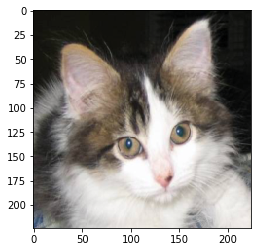

In [23]:
import pdb
pdb.set_trace()

def imshow(inp):
    inp = inp.numpy().transpose((1, 2, 0))   # 如此转置的原因？？？
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    
imshow(train[50][0])

In [25]:
train_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(valid, batch_size=64, num_workers=3)

In [59]:
dataset_sizes = {'train':len(train_data_gen.dataset),'valid':len(valid_data_gen.dataset)}
dataloaders = {'train':train_data_gen,'valid':valid_data_gen}

In [43]:
model_ft = models.resnet18(pretrained=True)

In [45]:
num_dfts = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_dfts, 2)

if torch.cuda.is_available():
    model_ft = model_ft.cuda()

In [47]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [49]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=0.9)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [62]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if torch.cuda.is_available():
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()
                
                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [1]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    start_time = time.time()
    
    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)
            else:
                model.train(False)
                
            running_loss = 0.0
            running_corrects = 0
            
            for data in dataloaders[phase]:
                inputs, labels = data
                
                if torch.cuda.is_available():
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)
                
                optimizer.zero_grad()
                
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
                
        print()
        
    time_elapsed = time.time() - start_time
    print('Training complete in (:.0f)m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.4f}'.format(best_acc))
    
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
md = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=5)